In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dados.csv")

In [ ]:
df.head()

,QualidadeAr(PPM),Temperatura,Umidade,Dia,Hora,Localizacao,Dia_da_Semana
0,46,30.0,32.0,2023-09-05,20,Jardins Mangueiral,Tuesday
1,46,30.0,33.0,2023-09-05,20,Jardins Mangueiral,Tuesday
2,46,30.0,32.0,2023-09-05,21,Jardins Mangueiral,Tuesday
3,46,30.0,32.0,2023-09-05,21,Jardins Mangueiral,Tuesday
4,47,30.0,34.0,2023-09-05,21,Jardins Mangueiral,Tuesday


In [ ]:
df.Umidade.min()

20.0

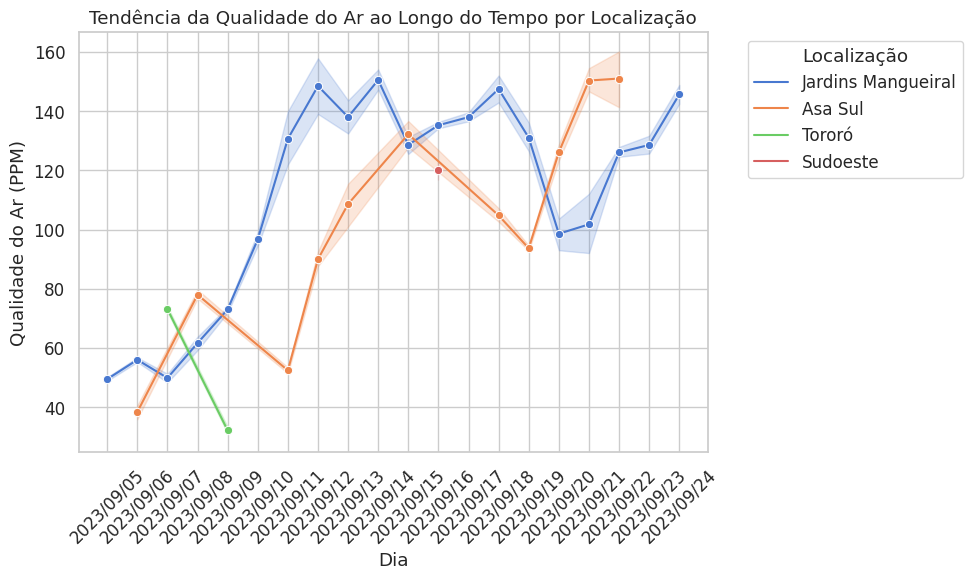

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Dia', y='QualidadeAr(PPM)', hue='Localizacao', data=df, palette='muted', marker='o')
plt.title('Tendência da Qualidade do Ar ao Longo do Tempo por Localização')
plt.xlabel('Dia')
plt.ylabel('Qualidade do Ar (PPM)')
plt.legend(title='Localização', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

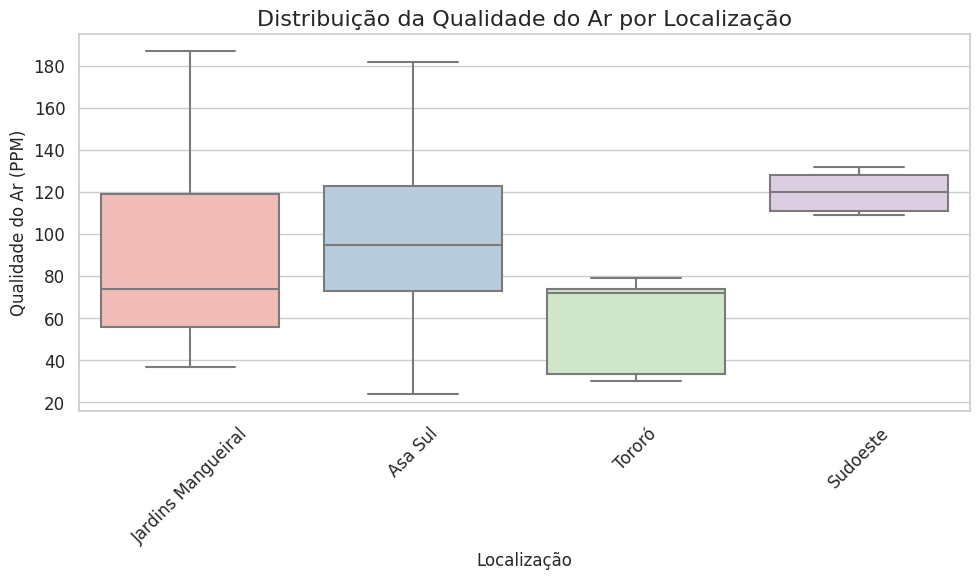

In [ ]:
# Gráfico de caixas (boxplot) para a Qualidade do Ar por Localizacao
plt.figure(figsize=(10, 6))
sns.boxplot(x='Localizacao', y='QualidadeAr(PPM)', data=df, palette='Pastel1')
plt.title('Distribuição da Qualidade do Ar por Localização', fontsize=16)
plt.xlabel('Localização', fontsize=12)
plt.ylabel('Qualidade do Ar (PPM)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


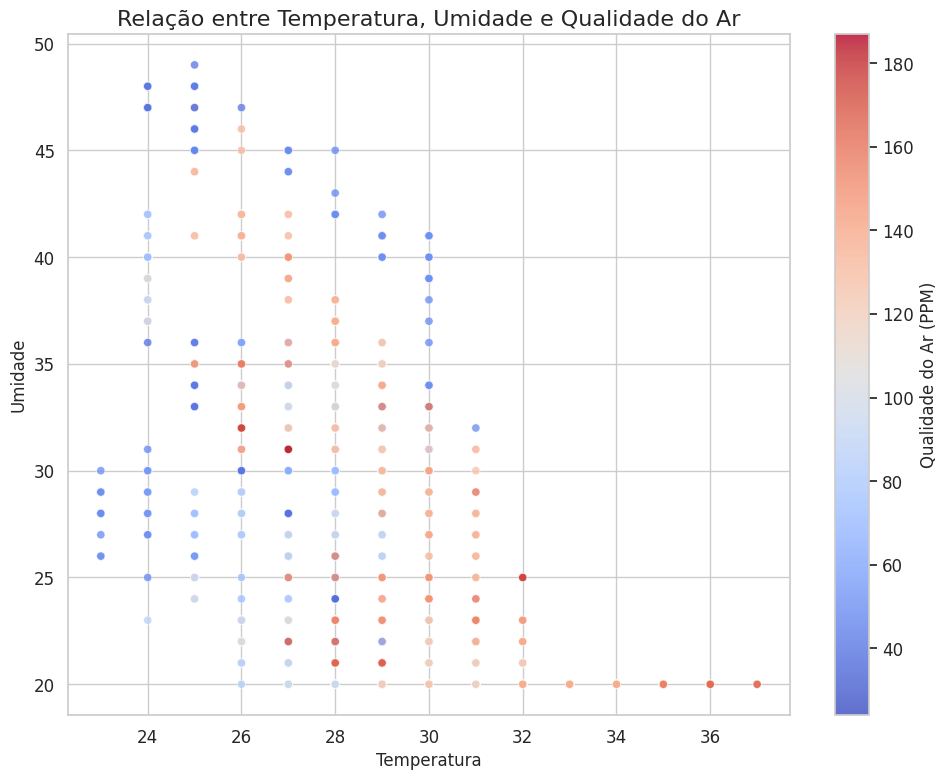

In [ ]:
# Ajustando o tamanho da fonte nos gráficos
sns.set_context("notebook", font_scale=1.1)

# Melhorando o gráfico de dispersão com uma escala de cores para a Qualidade do Ar
plt.figure(figsize=(10, 8))
scatter = plt.scatter(df['Temperatura'], df['Umidade'], c=df['QualidadeAr(PPM)'], cmap='coolwarm', alpha=0.8, edgecolors='w', linewidth=0.5)

plt.title('Relação entre Temperatura, Umidade e Qualidade do Ar', fontsize=16)
plt.xlabel('Temperatura', fontsize=12)
plt.ylabel('Umidade', fontsize=12)

# Adicionando uma barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Qualidade do Ar (PPM)', fontsize=12)

plt.tight_layout()
plt.show()

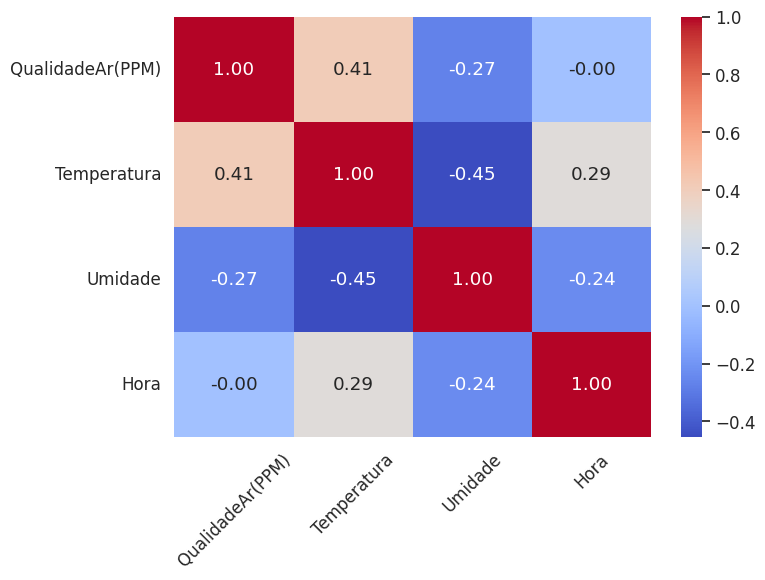

In [ ]:
# Selecionar apenas as variáveis numéricas para o heatmap
numeric_cols = df.select_dtypes(include='number')

plt.figure(figsize=(8, 6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


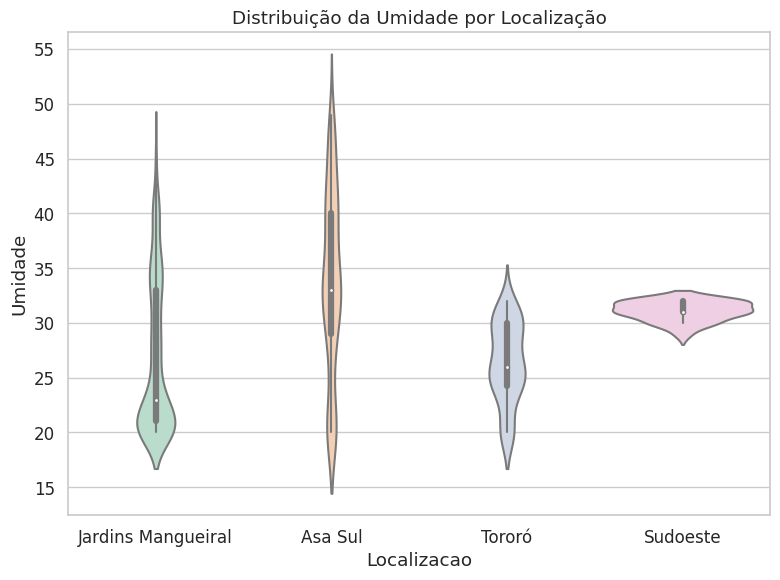

In [ ]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Localizacao', y='Umidade', data=df, palette='Pastel2')
plt.title('Distribuição da Umidade por Localização')
plt.xlabel('Localizacao')
plt.ylabel('Umidade')
plt.tight_layout()
plt.show()


#-------------------------------------------------------------------------------------------------------------------------------

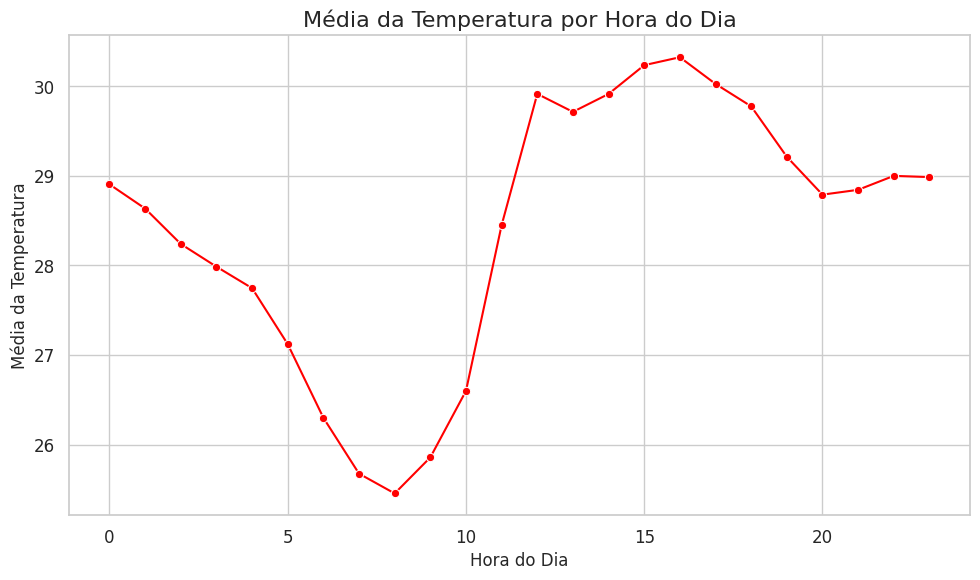

In [ ]:
df['Hora'] = pd.to_datetime(df['Hora'])

# Extraindo somente a informação da hora
df['Hora'] = df['Hora'].dt.hour

# Configurações de estilo
sns.set_style("whitegrid")

# Calculando a média da temperatura para cada hora
media_temperatura_por_hora = df.groupby('Hora')['Temperatura'].mean().reset_index()

# Gráfico de linha para a média da temperatura por hora do dia
plt.figure(figsize=(10, 6))
sns.lineplot(x='Hora', y='Temperatura', data=media_temperatura_por_hora, marker='o', color='red')
plt.title('Média da Temperatura por Hora do Dia', fontsize=16)
plt.xlabel('Hora do Dia', fontsize=12)
plt.ylabel('Média da Temperatura', fontsize=12)
plt.tight_layout()
plt.show()